# '한국 복지 패널 데이터' 데이터 분석

## 데이터 탐색(EDA)

In [33]:
!pip show pyreadstat

Name: pyreadstat
Version: 1.2.7
Summary: Reads and Writes SAS, SPSS and Stata files into/from pandas data frames.
Home-page: https://github.com/Roche/pyreadstat
Author: Otto Fajardo
Author-email: pleasecontactviagithub@notvalid.com
License: Apache License Version 2.0
Location: c:\users\i\appdata\roaming\python\python310\site-packages
Requires: pandas
Required-by: 


In [34]:
import warnings
warnings.filterwarnings(action='ignore')

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns # matplotlib의 출력을 더욱 화려하게 지원함.

import platform 

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

if (platform.system() == 'Windows'):  # Windows
    rc('font', family=font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name())
    path = '.' # Local
else:    
    plt.rc('font', family='NanumBarunGothic')  # Ubuntu 18.04 기준 한글 처리
    path = '/content/drive/My Drive/kd_ml/core' # Colab

plt.rcParams["font.size"] = 12         # 글자 크기
plt.rcParams["figure.figsize"] = (6, 3) # 10:4의 그래프 비율
plt.rcParams['axes.unicode_minus'] = False  # minus 부호는 unicode 적용시 한글이 깨짐으로 설정

pd.set_option('display.max_rows', 200)     # DataFrame 행은 최대 200까지 출력
pd.set_option('display.max_columns', None) # DataFrame 열은 무제한 출력

# Jupyter에게 matplotlib 그래프를 출력 영역에 표시할 것을 지시하는 명령
%matplotlib inline

In [35]:
raw = pd.read_spss('./Koweps_hpda18_2023_beta1.sav');
print(type(raw))

<class 'pandas.core.frame.DataFrame'>


In [36]:
display(raw)

h18_id  h18_ind  h18_sn   h18_merkey  h_new  h_new1  h18_cobf  \
0          2.0      1.0     1.0      20101.0    0.0     0.0       NaN   
1          3.0      1.0     1.0      30101.0    0.0     0.0       NaN   
2          4.0      1.0     1.0      40101.0    0.0     0.0       NaN   
3          6.0      1.0     1.0      60101.0    0.0     0.0       NaN   
4          6.0      1.0     1.0      60101.0    0.0     0.0       NaN   
...        ...      ...     ...          ...    ...     ...       ...   
15926  12010.0     17.0     1.0  120101701.0    0.0     1.0       NaN   
15927  12010.0     17.0     1.0  120101701.0    0.0     1.0       NaN   
15928  12010.0     17.0     1.0  120101701.0    0.0     1.0       NaN   
15929  12011.0     17.0     1.0  120111701.0    0.0     1.0       NaN   
15930  12011.0     17.0     1.0  120111701.0    0.0     1.0       NaN   

        p18_wsc   p18_wsl      p18_wgc      p18_wgl  p18_wsc_all  p18_wsl_all  \
0      0.256182  0.259465  1353.065043  1370.400690     0.128900     0.142616   
1      0.480753  0.397864  2539.170017  2101.380145     0.323196     0.292919   
2      0.232618  0.220094  1228.608612  1162.460089     0.120344     0.130870   
3      0.591596  0.524757  3124.604491  2771.583149     0.525128     0.365636   
4      0.940481  0.858730  4967.289420  4535.511333     0.825678     0.451208   
...         ...       ...          ...          ...          ...          ...   
15926       NaN       NaN          NaN          NaN          NaN          NaN   
15927       NaN       NaN          NaN          NaN          NaN          NaN   
15928       NaN       NaN          NaN          NaN          NaN          NaN   
15929       NaN       NaN          NaN          NaN          NaN          NaN   
15930       NaN       NaN          NaN          NaN          NaN          NaN   

       p18_wgc_all  p18_wgl_all  p18_wsc_n_all  p18_wgc_n_all  p18_wsl_n_all  \
0       544.096319   601.994578       0.107337     347.849639       0.134553   
1      1364.237528  1236.438581       0.322133    1043.947543       0.262898   
2       507.984502   552.415324       0.098653     319.706440       0.120413   
3      2216.612191  1543.380252       0.401018    1299.592988       0.355287   
4      3485.257658  1904.587658       0.770352    2496.504382       0.390780   
...            ...          ...            ...            ...            ...   
15926          NaN          NaN       0.629704    2040.704107       3.139763   
15927          NaN          NaN       4.743448   15372.248548       2.769366   
15928          NaN          NaN       1.193061    3866.390572       1.887241   
15929          NaN          NaN       0.479821    1554.971245       0.939940   
15930          NaN          NaN       0.400466    1297.803182       0.461997   

       p18_wgl_n_all  h18_reg5  h18_reg7  h18_din  h18_cin  h18_flag  h18_hc  \
0         436.051660       1.0       1.0    599.8    841.0       0.0     2.0   
1         851.983117       3.0       4.0   2106.0   2190.0       0.0     1.0   
2         390.226701       1.0       1.0   2088.0   2112.0       0.0     2.0   
3        1151.390468       1.0       1.0   4745.0   5153.0       0.0     2.0   
4        1266.415007       1.0       1.0   4745.0   5153.0       0.0     2.0   
...              ...       ...       ...      ...      ...       ...     ...   
15926   10175.133102       2.0       2.0   8470.0  10450.0       0.0     NaN   
15927    8974.776637       2.0       2.0   8470.0  10450.0       0.0     NaN   
15928    6116.044094       2.0       2.0   8470.0  10450.0       0.0     NaN   
15929    3046.093704       3.0       6.0   7569.0   8745.0       0.0     NaN   
15930    1497.210045       3.0       6.0   7569.0   8745.0       0.0     NaN   

       h18_hc_all  h18_hc_n_all  nh1801_1  nh1801_2  h1801_1  h18_pind  \
0             2.0           2.0       NaN       NaN      1.0       1.0   
1             1.0           1.0       NaN       NaN      1.0       1.0   
2             

In [37]:
raw.shape

(15931, 1155)

In [38]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15931 entries, 0 to 15930
Columns: 1155 entries, h18_id to h18_pers_income5
dtypes: float64(1154), object(1)
memory usage: 140.4+ MB


In [39]:
cols = raw.columns.values
print(type(cols))
print(cols)

<class 'numpy.ndarray'>
['h18_id' 'h18_ind' 'h18_sn' ... 'h18_pers_income3' 'h18_pers_income4'
 'h18_pers_income5']


In [40]:
for col in cols:
    print(col, end=',')

h18_id,h18_ind,h18_sn,h18_merkey,h_new,h_new1,h18_cobf,p18_wsc,p18_wsl,p18_wgc,p18_wgl,p18_wsc_all,p18_wsl_all,p18_wgc_all,p18_wgl_all,p18_wsc_n_all,p18_wgc_n_all,p18_wsl_n_all,p18_wgl_n_all,h18_reg5,h18_reg7,h18_din,h18_cin,h18_flag,h18_hc,h18_hc_all,h18_hc_n_all,nh1801_1,nh1801_2,h1801_1,h18_pind,h18_pid,h18_g1,h18_g2,h18_g3,h18_g4,h18_g6,h18_g7,h18_g8,h18_g9,h18_g10,h18_g11,h18_g12,h1801_110,h1801_13aq1,h1801_11aq2,h1801_11aq3,h1801_11aq5,h1801_11aq6,h1801_11aq8,h1801_11aq10,h18_med1,h18_med2,h18_med3,h18_med4,h18_med5,h18_med6,h18_med7,h18_med8,h18_g9_1,h18_med10,h18_eco1,h18_eco2,h18_eco3,h18_eco4,h18_eco4_1,h18_eco5_1,h18_eco6,h18_eco_7_1,h18_eco_7_2,h18_eco_7_3,h18_eco8,h18_eco9,h18_eco10,h18_eco11,h18_soc1,h18_soc_2,h18_soc_3,h18_soc_4,h18_soc_5,h18_soc_6,h18_soc_7,h18_soc_8,h18_soc_9,h18_soc_10,h18_soc_11,h18_soc8,h18_soc9,h18_soc11,h18_soc10,h18_soc_12,h18_soc_13,h1805_1,h1805_3aq1,h1805_2,h1805_3,h1805_4,h1805_5,h1805_6,h1805_7,h1805_3aq2,h1806_aq1,h1806_14aq1,h1806_1,h1806_

In [41]:
if 'p1802_8aq1' in cols:
    print('-> p1802_8aq1')

-> p1802_8aq1


In [42]:
# 1~18차 머지데이터_변수명.xlsx
raw=raw.rename(
columns={'h18_g3'     : 'gender',         #  성별, 1: 남, 2: 여, 1~18차 머지데이터_변수명.xlsx
         'h18_g4'     : 'birth',          #  태어난 연도, 1~18차 머지데이터_변수명.xlsx
         'h18_g10'    : 'marriage_type',  #  혼인 상태, 1~18차 머지데이터_변수명.xlsx
         'h18_g11'    : 'religion',       #  종교, 1~18차 머지데이터_변수명.xlsx 
         'p1802_8aq1' : 'income',         #  일한달의 월 평균 임금, (2023년 18차 한국복지패널조사) 조사설계서-가구원용(beta1).xlsx 
         'h18_eco9'   : 'code_job',       #  직업 코드, 1~18차 머지데이터_변수명.xlsx
         'h18_reg7'   : 'code_region'})   #  7개 권역별 지역구분, 1~18차 머지데이터_변수명.xlsx

In [43]:
print(type(raw))

<class 'pandas.core.frame.DataFrame'>


In [44]:
# raw.to_excel('welfare_2023.xlsx', index=False) # 100MB 이상은 속도가 너무 느려 사용하기 어려움 

In [45]:
# 컬럼을 지우는 방법
# raw.drop('h18_id', axis=1, inplace=True) # 컬럼이 너무 많아서 어려움

In [46]:
# 사용할 컬럼만 추출
df = raw[['gender', 'birth', 'marriage_type', 'religion', 'income', 'code_job', 'code_region']]
df.head()

,gender,birth,marriage_type,religion,income,code_job,code_region
0,2.0,1945.0,2.0,1.0,NaN,NaN,1.0
1,1.0,1948.0,2.0,2.0,180.0,942.0,4.0
2,1.0,1942.0,3.0,1.0,NaN,952.0,1.0
3,1.0,1962.0,1.0,1.0,252.0,855.0,1.0
4,2.0,1963.0,1.0,1.0,NaN,NaN,1.0


In [47]:
df.describe() # 수치형 컬럼에 대한 기술(요약) 통계

,gender,birth,marriage_type,religion,income,code_job,code_region
count,15931.000000,15931.000000,15931.000000,15931.000000,5630.000000,8230.000000,15931.000000
mean,1.551566,1969.424016,1.814575,1.564685,284.461989,589.831106,3.854937
std,0.497349,24.226765,1.584931,0.495814,222.592542,267.589384,2.037559
min,1.000000,1906.000000,0.000000,1.000000,0.000000,111.000000,1.000000
25%,1.000000,1949.000000,1.000000,1.000000,133.250000,313.000000,2.000000
50%,2.000000,1965.000000,1.000000,2.000000,250.000000,611.000000,3.000000
75%,2.000000,1988.000000,2.000000,2.000000,375.000000,873.000000,6.000000
max,2.000000,2022.000000,6.000000,2.000000,2333.000000,1002.000000,7.000000


In [48]:
df.to_csv('welfare_2023.csv', index=False, encoding='utf-8')

In [49]:
df = pd.read_csv('welfare_2023.csv')
df.head()

,gender,birth,marriage_type,religion,income,code_job,code_region
0,2.0,1945.0,2.0,1.0,NaN,NaN,1.0
1,1.0,1948.0,2.0,2.0,180.0,942.0,4.0
2,1.0,1942.0,3.0,1.0,NaN,952.0,1.0
3,1.0,1962.0,1.0,1.0,252.0,855.0,1.0
4,2.0,1963.0,1.0,1.0,NaN,NaN,1.0


## 성별에 따른 월급 차이 분석, IT 관련 분석

In [50]:
df = pd.read_csv('welfare_2023.csv')
df.head()

,gender,birth,marriage_type,religion,income,code_job,code_region
0,2.0,1945.0,2.0,1.0,NaN,NaN,1.0
1,1.0,1948.0,2.0,2.0,180.0,942.0,4.0
2,1.0,1942.0,3.0,1.0,NaN,952.0,1.0
3,1.0,1962.0,1.0,1.0,252.0,855.0,1.0
4,2.0,1963.0,1.0,1.0,NaN,NaN,1.0


In [51]:
# 성별 확인, 성별, 1: 남, 2: 여
df['gender'].head(3)
df['gender'].dtype

0    2.0
1    1.0
2    1.0
Name: gender, dtype: float64

dtype('float64')

In [52]:
# 빈도 분석
df['gender'].value_counts()

gender
2.0    8787
1.0    7144
Name: count, dtype: int64

In [53]:
# 이상치의 결측치 처리, 모든 사람이 성별을 응답함.
df['gender'] = np.where(df['gender']==9, np.nan, df['gender']) # 조건, 참, 거짓
df['gender'].isna().sum()
df['gender'].isnull().sum()

0

0

In [54]:
# p = sns.barplot(data=df, x='gender') # X

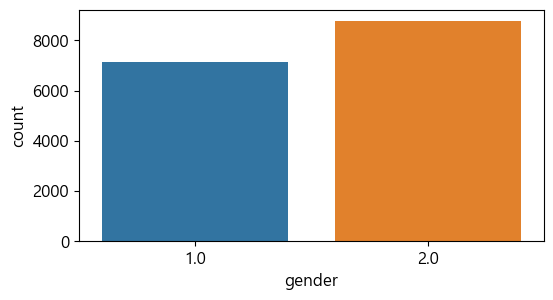

In [55]:
p = sns.countplot(data=df, x='gender') # 

In [56]:
# df['gender'] = np.where(df['gender']==1, 'male', 'female')
df['gender'] = np.where(df['gender']==1, '남자', '여자')
df['gender'].value_counts()

gender
여자    8787
남자    7144
Name: count, dtype: int64

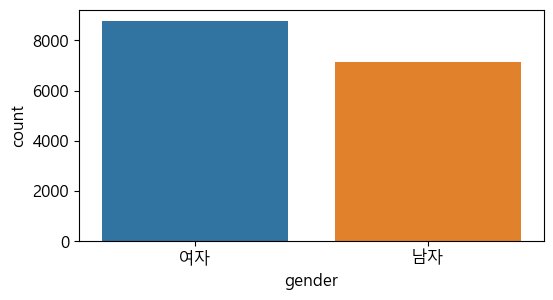

In [57]:
p = sns.countplot(data=df, x='gender')

In [58]:
df['income'].dtypes

dtype('float64')

In [59]:
df['income'].isnull().sum()

10301

In [60]:
df['income'].head(10)

0      NaN
1    180.0
2      NaN
3    252.0
4      NaN
5      NaN
6      NaN
7      NaN
8     27.0
9      NaN
Name: income, dtype: float64

<Axes: xlabel='income', ylabel='Count'>

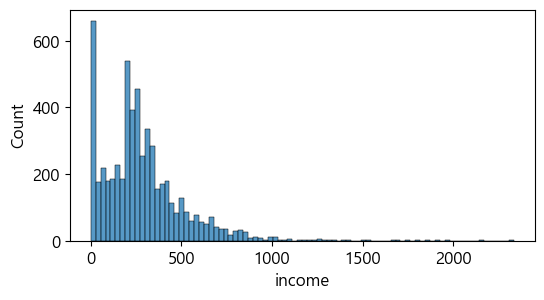

In [61]:
sns.histplot(data=df, x='income')

In [62]:
test = np.array([40,50,np.nan])
test.mean()

test = pd.DataFrame({'name': ['a','b','c'], 'sungjuk': [40,50,np.nan]})
test

test['sungjuk'].mean()

nan

,name,sungjuk
0,a,40.0
1,b,50.0
2,c,NaN


45.0

In [63]:
gender_income = df.dropna(subset=['income']) 
gender_income['income'].isnull().sum()

0

In [64]:
gender_income = df.dropna(subset=['income'])
gender_income = gender_income.groupby(['gender'])
display(gender_income)


In [65]:
gender_income.head(1)

,gender,birth,marriage_type,religion,income,code_job,code_region
1,남자,1948.0,2.0,2.0,180.0,942.0,4.0
8,여자,1940.0,2.0,1.0,27.0,941.0,2.0


In [66]:
gender_income.iloc[0:]


AttributeError: 'DataFrameGroupBy' object has no attribute 'iloc'

In [ ]:
print(f'여성의 평균 급여는 남성의 몇 {}% 임')


In [ ]:
df.head(3)

In [ ]:
## IT 직군의 성별에 따른 월급 차이 분석
- code_job: 직종 코드, (2023년 18차 한국복지패널조사) 조사설계서-가구용(beta1).xlsx
    - 0221	컴퓨터 하드웨어 및 통신공학 전문가
    - 0222	컴퓨터 시스템 및 소프트웨어 전문가
    - 0223	데이터 및 네트워크 관련 전문가
    - 0224	정보 시스템 및 웹 운영자

In [67]:
it_df = df[['gender','income','code_job']].dropna(subset=['income']).query('code_job in [222,224,224]')

it_df.head()

,gender,income,code_job
146,남자,637.0,222.0
152,남자,267.0,222.0
255,남자,500.0,222.0
286,남자,925.0,222.0
401,남자,481.0,222.0


In [68]:
per = it_income.iloc[0]['income_mean']/it_income.iloc[1]['income_mean']
print(f'여성의 평균 급여는 남성의 몇 {round(per,2)}% 임')


NameError: name 'it_income' is not defined

In [69]:
p = plt.figure(figsize=(5, 2))
p = sns.barplot(data=it_income, y='income_mean', x='year')

NameError: name 'it_income' is not defined

<Figure size 500x200 with 0 Axes>

In [70]:
gender_income['year'] = gender_income['income_mean'] * 12
gender_income

KeyError: 'Column not found: income_mean'

In [71]:
p=plt.figure(figsize=(5,2))
p=sns.barplot(data=gender_income, y='year', x = 'gender')

AttributeError: 'DataFrameGroupBy' object has no attribute 'get'

<Figure size 500x200 with 0 Axes>

In [72]:
# it_income['gubun']

In [73]:
conn = cx.connect("team1", "69017000", "3.39.75.85:1521/xe")
cursor = conn.cursor()


select_ex = '''
SELECT *
from history 
'''

cursor.execute(select_ex)
rows = cursor.fetchall()


<cx_Oracle.Cursor on <cx_Oracle.Connection to team1@3.39.75.85:1521/xe>>

In [74]:
import json
import os
import time
import requests
from datetime import datetime
import random
import cx_Oracle as cx
import pandas as pd




from flask import Flask, request, render_template
from flask_cors import CORS



In [75]:
rows

[(3,
  '유산소',
  '런닝',
  5,
  60,
  '상체, 하체 완료',
  datetime.datetime(2024, 6, 22, 0, 0),
  datetime.datetime(2024, 6, 22, 12, 0),
  None,
  5),
 (4,
  '유산소',
  '런닝',
  5,
  60,
  '상체, 하체 완료',
  datetime.datetime(2024, 6, 22, 0, 0),
  datetime.datetime(2024, 6, 23, 12, 0),
  None,
  5),
 (5,
  '123',
  '\n                    \n                    헬스\n                ',
  123,
  0,
  'No notes',
  datetime.datetime(2024, 6, 5, 0, 0),
  datetime.datetime(2024, 6, 28, 13, 33, 38),
  None,
  5),
 (6,
  '12',
  '\n                    \n                    헬스\n                ',
  112,
  0,
  'No notes',
  datetime.datetime(2024, 6, 12, 0, 0),
  datetime.datetime(2024, 6, 28, 14, 59, 51),
  None,
  5),
 (7,
  '123',
  '\n                    \n                    헬스\n                ',
  234,
  30,
  'ㅇㅊㅁㄴㅇㄴㅇㅊ',
  datetime.datetime(2024, 6, 11, 0, 0),
  datetime.datetime(2024, 6, 28, 15, 1, 17),
  None,
  5),
 (8,
  '바벨컬',
  '\n                    \n                    헬스\n                ',
  

In [76]:
columns = ['EXRECORDNO', 'EXNAME', 'EXTYPE', 'HISCALORIE', 'DURATION', 'NOTES', 'RECORDDATE', 'STARTDATE', 'EXUPDATEDATE', 'MEMBERNO']
df = pd.DataFrame(rows, columns=columns)

file_path = 'exercise_records.xlsx'
df.to_excel(file_path, index=False)

file_path

'exercise_records.xlsx'

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='EXTYPE', ylabel='Count'>

Text(0.5, 1.0, 'EXTYPE Distribution')

Text(0.5, 0, 'EXTYPE')

Text(0, 0.5, 'Count')

(array([0, 1, 2, 3]),
 [Text(0, 0, '\n                    \n                    헬스\n                '),
  Text(1, 0, '\n                    \n                    유산소\n                '),
  Text(2, 0, '\n                    \n                    등산\n                '),
  Text(3, 0, '런닝')])

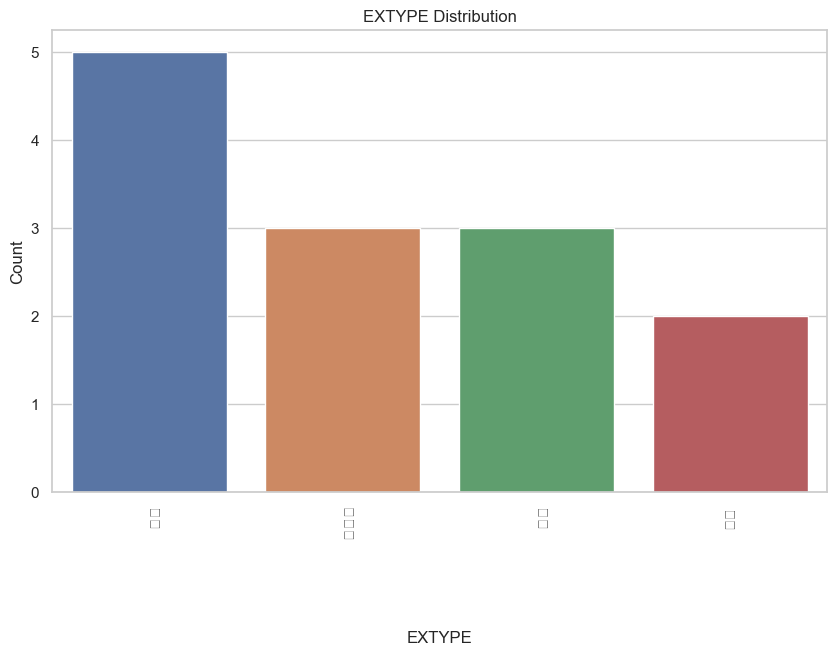

In [77]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 엑셀 파일 경로
file_path = './exercise_records.xlsx'

# 엑셀 파일 읽기
df = pd.read_excel(file_path)

# EXTYPE의 분포 계산
extype_distribution = df['EXTYPE'].value_counts().reset_index()
extype_distribution.columns = ['EXTYPE', 'Count']

# Seaborn 스타일로 그래프 설정
sns.set(style="whitegrid")

# EXTYPE 분포 시각화
plt.figure(figsize=(10, 6))
sns.barplot(data=extype_distribution, x='EXTYPE', y='Count')
plt.title('EXTYPE Distribution')
plt.xlabel('EXTYPE')
plt.ylabel('Count')
plt.xticks(rotation=90)  # x축 레이블 회전
plt.show()

In [78]:
font_path = 'C:/Windows/Fonts/malgun.ttf'  # Windows의 경우
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)

NameError: name 'fm' is not defined

In [79]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='EXTYPE', ylabel='Count'>

Text(0.5, 1.0, 'EXTYPE Distribution')

Text(0.5, 0, 'EXTYPE')

Text(0, 0.5, 'Count')

(array([0, 1, 2, 3]),
 [Text(0, 0, '\n                    \n                    헬스\n                '),
  Text(1, 0, '\n                    \n                    유산소\n                '),
  Text(2, 0, '\n                    \n                    등산\n                '),
  Text(3, 0, '런닝')])

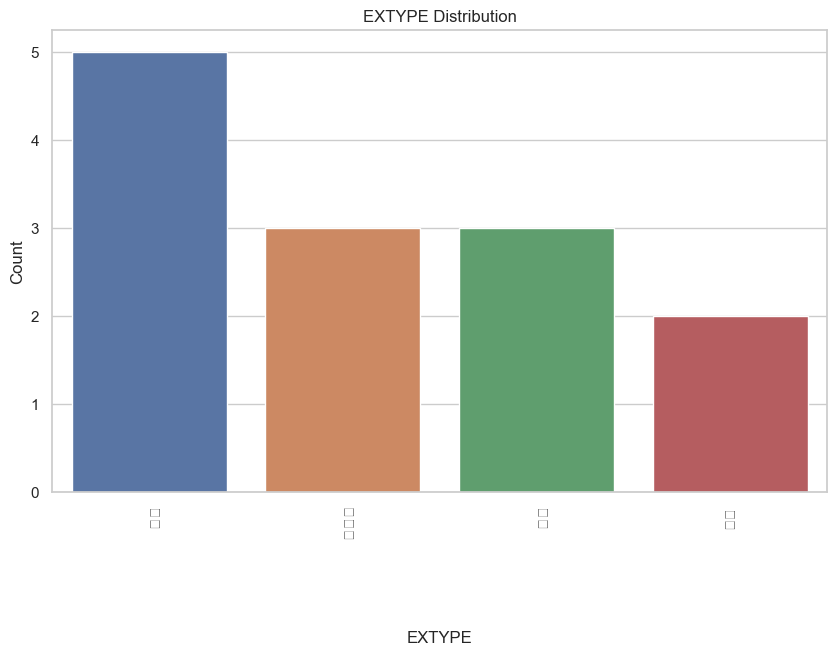

In [80]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정
font_path = 'C:/Windows/Fonts/malgun.ttf'  # Windows의 경우
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)

# 엑셀 파일 경로
file_path = './exercise_records.xlsx'

# 엑셀 파일 읽기
df = pd.read_excel(file_path)

# EXTYPE의 분포 계산
extype_distribution = df['EXTYPE'].value_counts().reset_index()
extype_distribution.columns = ['EXTYPE', 'Count']

# Seaborn 스타일로 그래프 설정
sns.set(style="whitegrid")

# EXTYPE 분포 시각화
plt.figure(figsize=(10, 6))
sns.barplot(data=extype_distribution, x='EXTYPE', y='Count')
plt.title('EXTYPE Distribution')
plt.xlabel('EXTYPE')
plt.ylabel('Count')
plt.xticks(rotation=90)  # x축 레이블 회전
plt.show()

In [81]:
font_path = 'C:/Windows/Fonts/malgun.ttf'  # 맑은 고딕 폰트 경로
font_name = fm.FontProperties(fname=font_path).get_name()
rcParams['font.family'] = font_name


NameError: name 'rcParams' is not defined

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='EXTYPE', ylabel='Count'>

Text(0.5, 1.0, 'EXTYPE Distribution')

Text(0.5, 0, 'EXTYPE')

Text(0, 0.5, 'Count')

(array([0, 1, 2, 3]),
 [Text(0, 0, '\n                    \n                    헬스\n                '),
  Text(1, 0, '\n                    \n                    유산소\n                '),
  Text(2, 0, '\n                    \n                    등산\n                '),
  Text(3, 0, '런닝')])

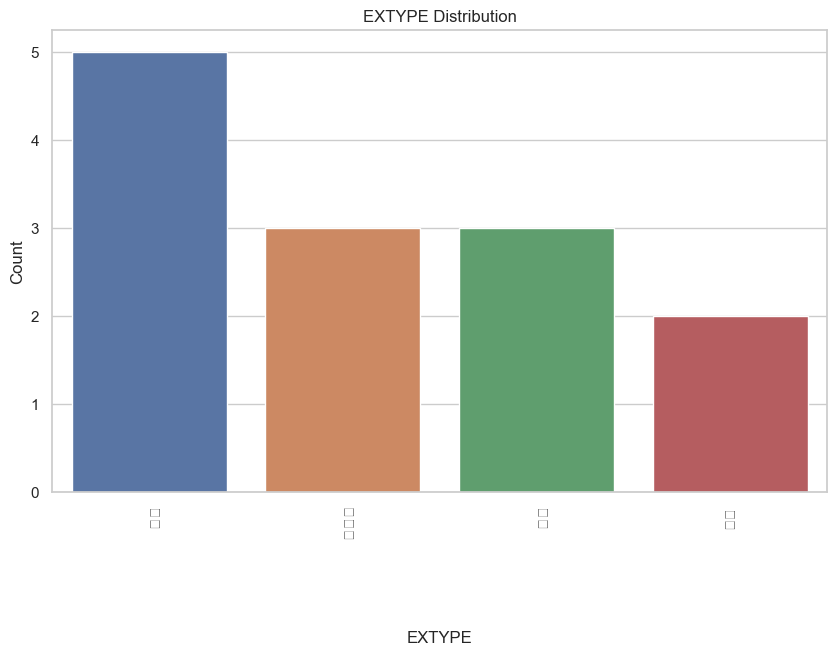

In [82]:
df = pd.read_excel(file_path)

# EXTYPE의 분포 계산
extype_distribution = df['EXTYPE'].value_counts().reset_index()
extype_distribution.columns = ['EXTYPE', 'Count']

# Seaborn 스타일로 그래프 설정
sns.set(style="whitegrid")

# EXTYPE 분포 시각화
plt.figure(figsize=(10, 6))
sns.barplot(data=extype_distribution, x='EXTYPE', y='Count')
plt.title('EXTYPE Distribution')
plt.xlabel('EXTYPE')
plt.ylabel('Count')
plt.xticks(rotation=90)  # x축 레이블 회전
plt.show()

In [83]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rcParams

# 폰트를 matplotlib에 설정합니다.
font_path = 'C:/Windows/Fonts/LINESeedKR-Rg.ttf'  # 맑은 고딕 폰트 경로
font_name = fm.FontProperties(fname=font_path).get_name()
rcParams['font.family'] = font_name

# 엑셀 파일 경로
file_path = './exercise_records.xlsx'

# 엑셀 파일 읽기
df = pd.read_excel(file_path)

# EXTYPE의 분포 계산
extype_distribution = df['EXTYPE'].value_counts().reset_index()
extype_distribution.columns = ['EXTYPE', 'Count']

# Seaborn 스타일로 그래프 설정
sns.set(style="whitegrid")

# EXTYPE 분포 시각화
plt.figure(figsize=(10, 6))
sns.barplot(data=extype_distribution, x='EXTYPE', y='Count')
plt.title('EXTYPE Distribution')
plt.xlabel('EXTYPE')
plt.ylabel('Count')
plt.xticks(rotation=90)  # x축 레이블 회전
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Windows\\Fonts\\LINESeedKR-Rg.ttf'

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='EXTYPE', ylabel='Count'>

Text(0.5, 1.0, 'EXTYPE Distribution')

Text(0.5, 0, 'EXTYPE')

Text(0, 0.5, 'Count')

(array([0, 1, 2, 3]),
 [Text(0, 0, 'health'),
  Text(1, 0, 'cardio'),
  Text(2, 0, 'mountain'),
  Text(3, 0, 'running')])

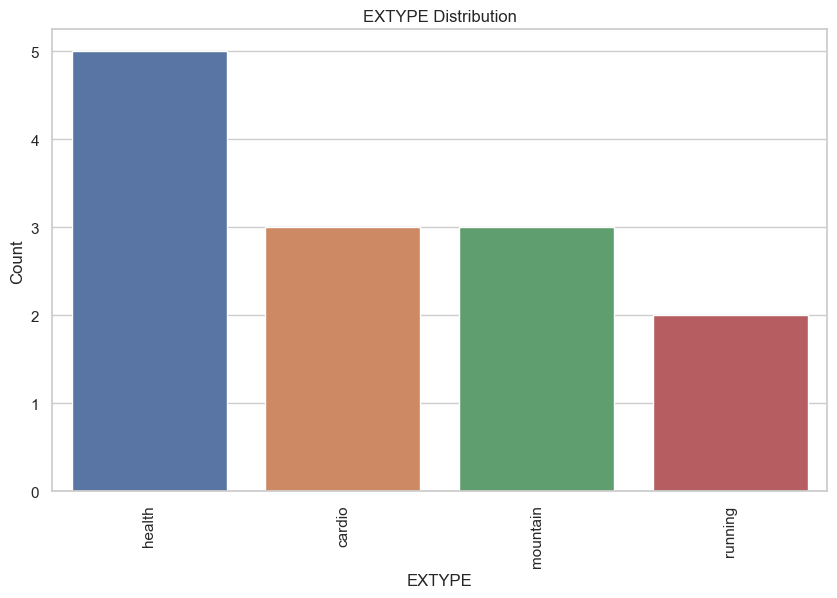

In [90]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rcParams

# 폰트를 matplotlib에 설정합니다.


# 엑셀 파일 경로
file_path = './exercise_records.xlsx'

# 엑셀 파일 읽기
df = pd.read_excel(file_path)

# EXTYPE의 분포 계산
extype_distribution = df['EXTYPE'].value_counts().reset_index()
extype_distribution.columns = ['EXTYPE', 'Count']

# Seaborn 스타일로 그래프 설정
sns.set(style="whitegrid")


plt.rcParams["font.size"] = 12         # 글자 크기
plt.rcParams["figure.figsize"] = (6, 3) # 10:4의 그래프 비율
plt.rcParams['axes.unicode_minus'] = False  # minus 부호는 unicode 적용시 한글이 깨짐으로 설정

# EXTYPE 분포 시각화
plt.figure(figsize=(10, 6))
sns.barplot(data=extype_distribution, x='EXTYPE', y='Count')
plt.title('EXTYPE Distribution')
plt.xlabel('EXTYPE')
plt.ylabel('Count')
plt.xticks(rotation=90)  # x축 레이블 회전
plt.show()

In [85]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'malgun'

In [86]:
import warnings
warnings.filterwarnings(action='ignore')

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns # matplotlib의 출력을 더욱 화려하게 지원함.

import platform 

if (platform.system() == 'Windows'):  # Windows
    rc('font', family=font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name())
    path = '.' # Local
else:    
    plt.rc('font', family='NanumBarunGothic')  # Ubuntu 18.04 기준 한글 처리
    path = '/content/drive/My Drive/kd_ml/core' # Colab

plt.rcParams["font.size"] = 12         # 글자 크기
plt.rcParams["figure.figsize"] = (6, 3) # 10:4의 그래프 비율
plt.rcParams['axes.unicode_minus'] = False  # minus 부호는 unicode 적용시 한글이 깨짐으로 설정

# Jupyter에게 matplotlib 그래프를 출력 영역에 표시할 것을 지시하는 명령
%matplotlib inline

<Axes: xlabel='HISCALORIE', ylabel='DURATION'>

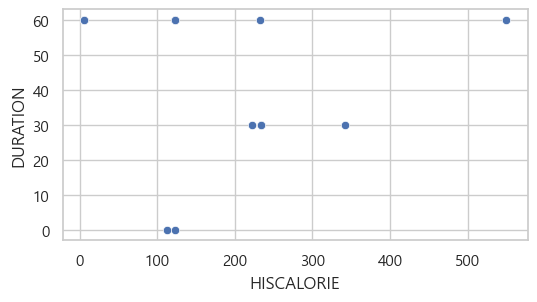

In [87]:
sns.scatterplot(data=df, x='HISCALORIE', y='DURATION')